In [2]:
import os
print(os.listdir('/content/drive/MyDrive/archive/flowers'))

['tulip', 'dandelion', 'sunflower', 'daisy', 'rose']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Bo qua cac canh bao
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Thao tac va truc quan hoa du lieu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#cauhinh 
# Dat matplotlib thanh noi tuyen va hien thi do thi ben duoi o tuong ung.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

##Thực hiện các chức năng để lấy bộ đào tạo và xác nhận từ Hình ảnh


In [5]:
data_dir = '/content/drive/MyDrive/archive/flowers/'

#  Thong ke du lieu, bien du lieu ve dang bang 
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df 
data_count = count_exp(data_dir, 'data')
#  In de kiem tra 
print(data_count)

      tulip  dandelion  sunflower  daisy  rose
data    990       1052        733    764   784


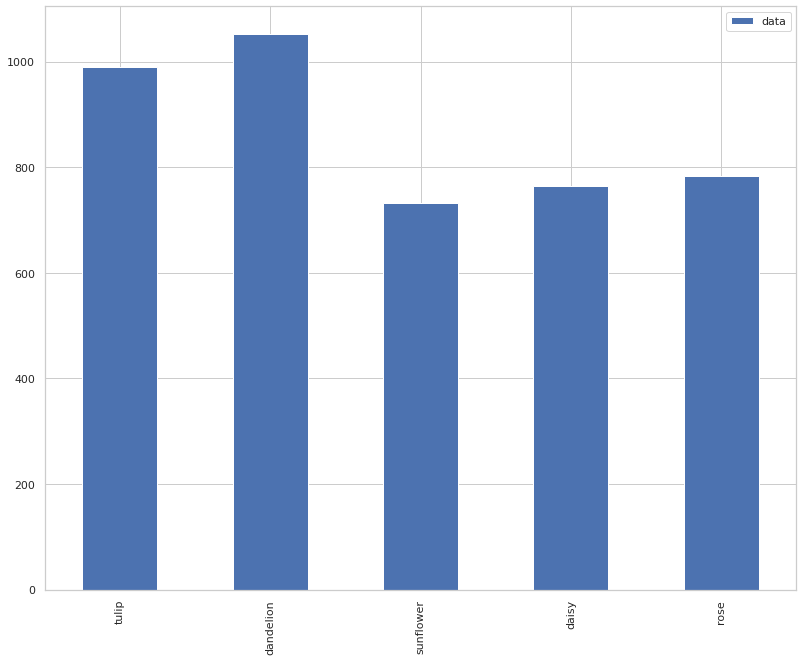

In [6]:

data_count.transpose().plot(kind='bar', figsize=(12,10))

In [7]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/archive/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/archive/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/archive/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/archive/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/archive/flowers/rose'


In [8]:
def assign_label(img,flower_type):
    return flower_type
    

In [9]:
def make_train_data(flower_type,DIR): #train 
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [10]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:12<00:00, 59.10it/s] 

764


In [11]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:12<00:00, 59.54it/s] 

1497


In [12]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 990/990 [00:16<00:00, 58.99it/s] 

2487


In [13]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:17<00:00, 60.87it/s] 

3539


In [14]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:12<00:00, 64.10it/s] 

4323


## 2.2 ) Random 1 số  ảnh

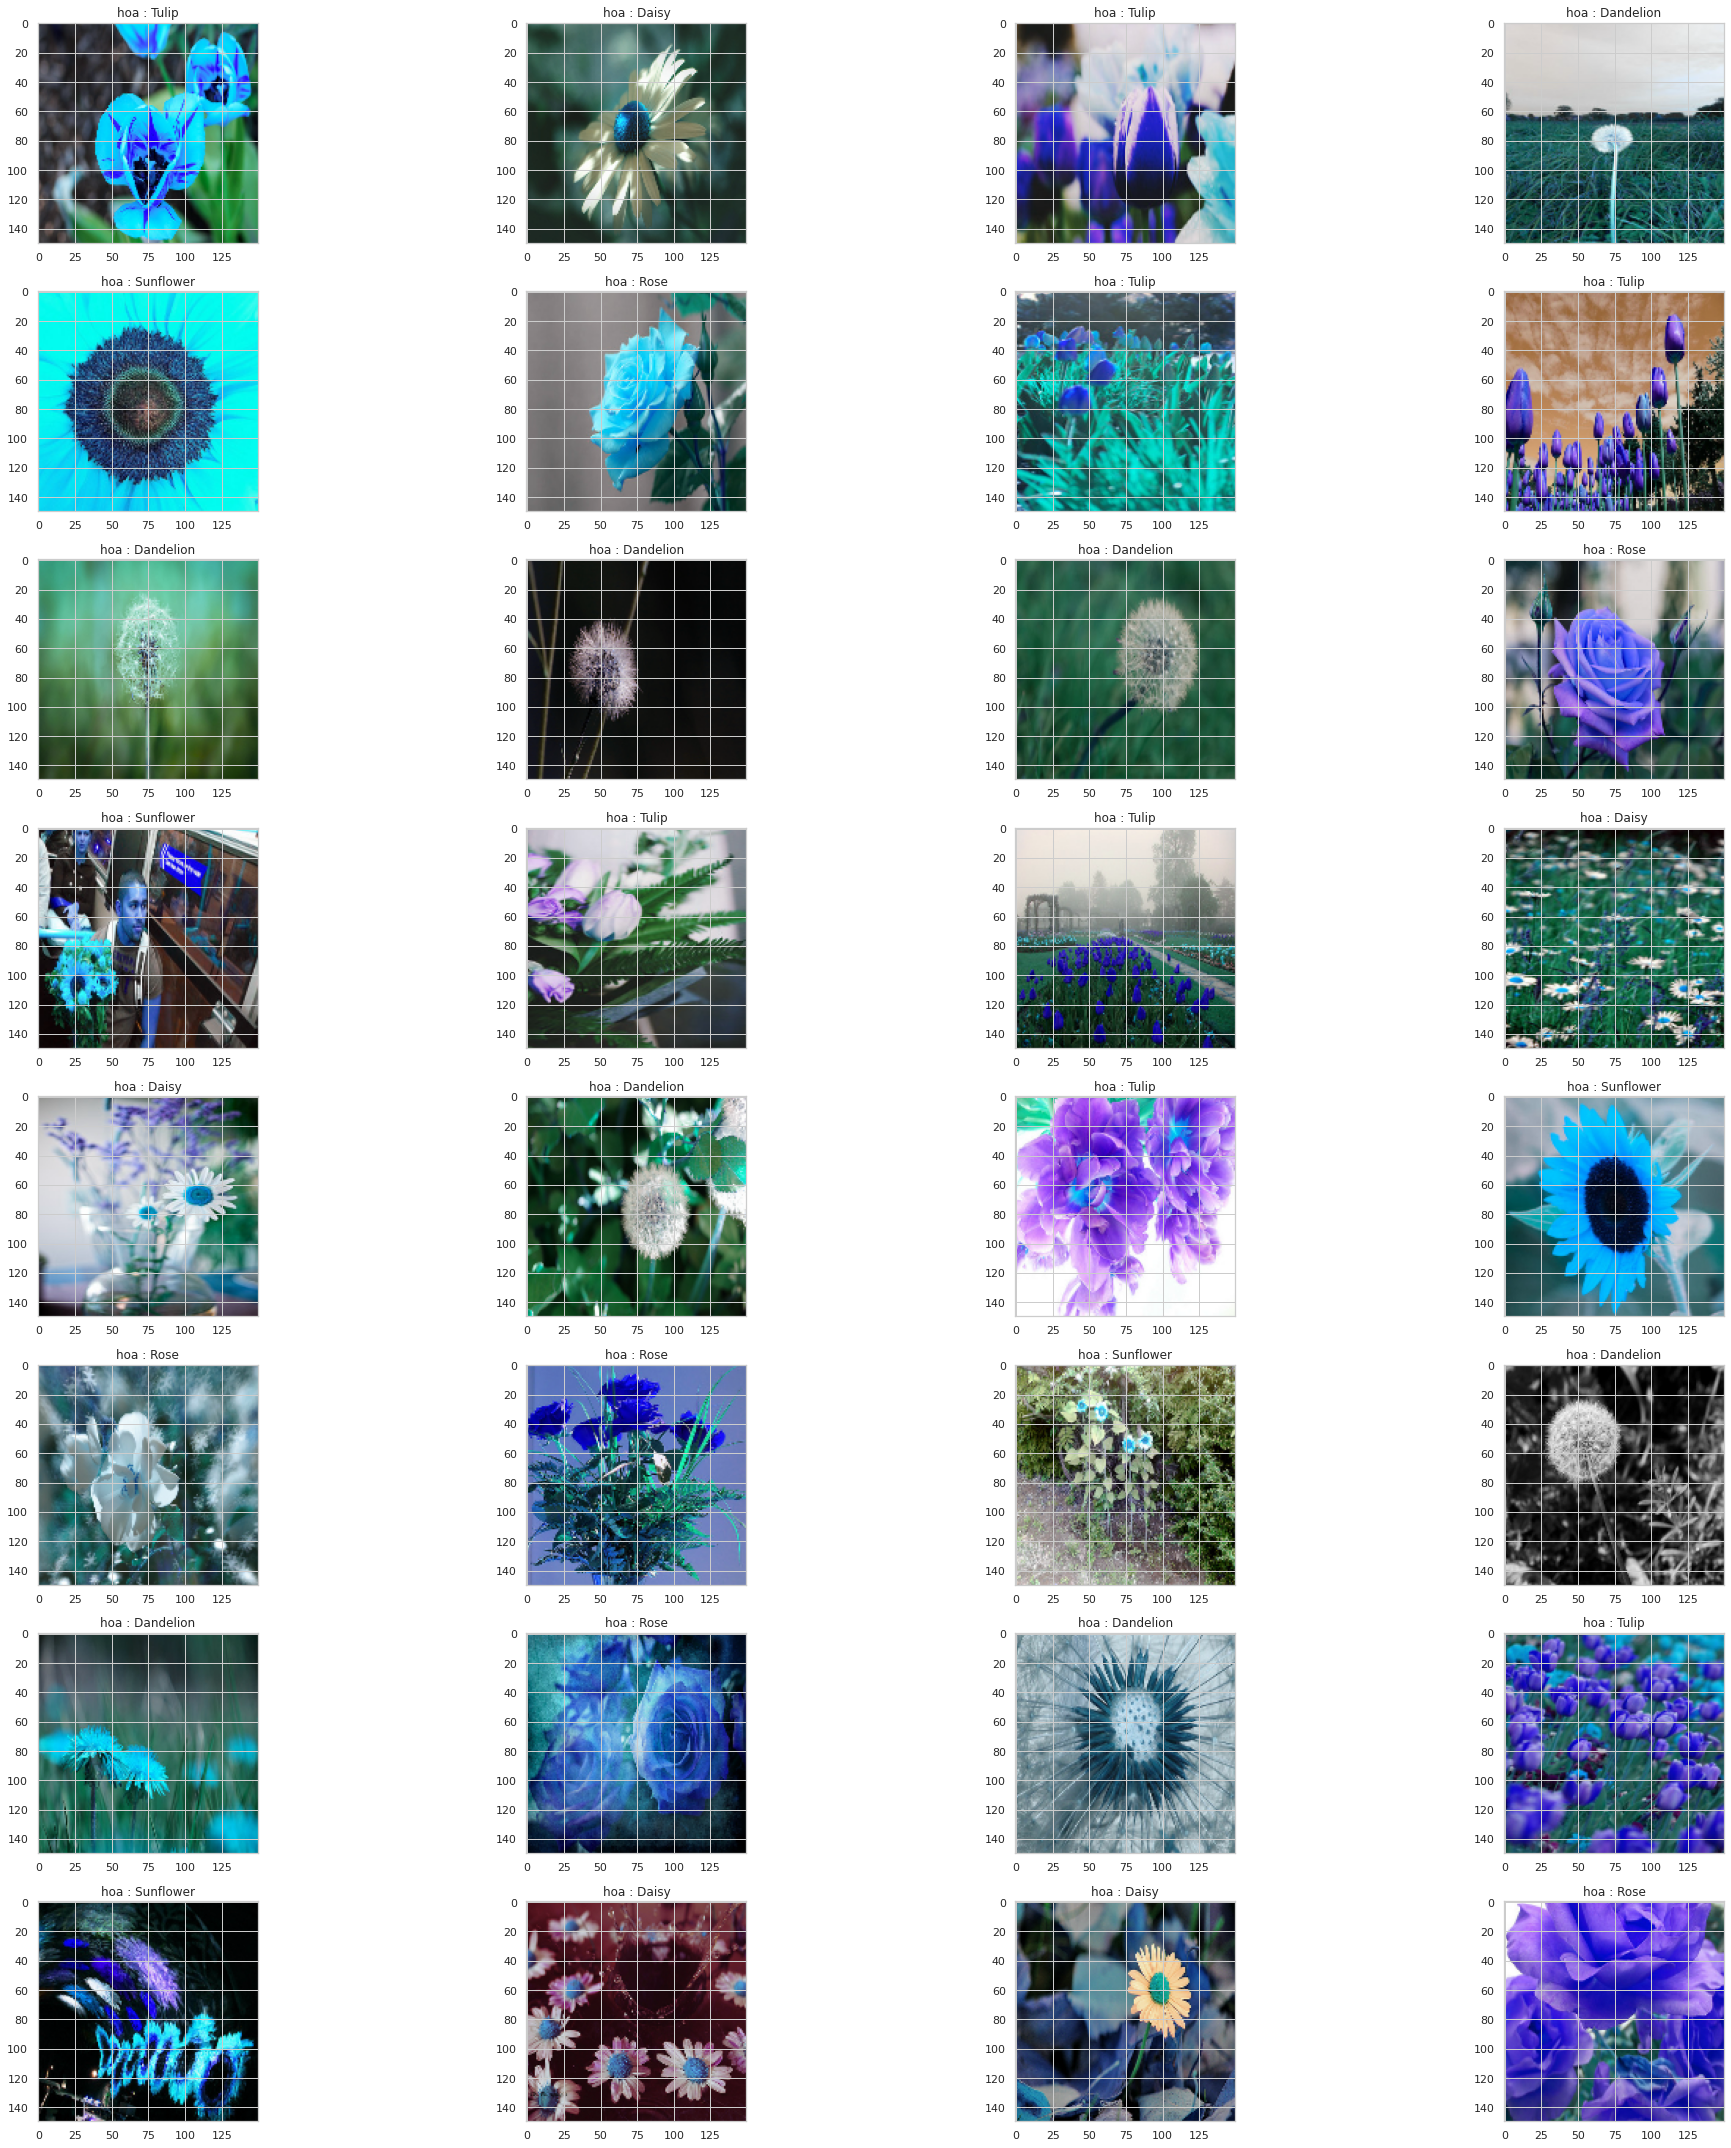

In [15]:
fig,ax=plt.subplots(8,4) #range 32 hoa
fig.set_size_inches(30,30)
for i in range(8):
    for j in range (4):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('hoa : '+Z[l])
        
plt.tight_layout()
        

## 2.3 )Mã hóa nhãn cho mảng Y (tức là Daisy-> 0, Rose-> 1, v.v.) 

In [16]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

## 2.4 ) Chia thành các bộ đào tạo và xác thực 

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [18]:
np.random.seed(50)
rn.seed(50)
tf.random.set_seed(50)  #set_random_seed

<a id="content3"></a>
## 3 ) Mô hình hóa 

## 3.1 ) Xây dựng Mô hình ConvNet 

In [19]:
# # Lap mo hinh su dung CNN. 

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

test

## 3.2 )Sử dụng LR Annealer 

In [25]:
batch_size=128
epochs=50 # lay 150

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## 3.3 ) Tăng cường dữ liệu để ngăn chặn Overfeatting 

In [26]:
datagen = ImageDataGenerator(
        featurewise_center=False, # Dat gia tri dau vao thanh 0 tren tap du lieu
        samplewise_center=False, #  Dat gia tri trung binh cua moi mau thanh 0
        featurewise_std_normalization=False, #  Chia dau vao cho std cua tap du lieu
        samplewise_std_normalization=False,  #  Chia moi dau vao cho std cua no
        zca_whitening=False,  # apply ZCA whitening(tay trang)
        rotation_range=10,  # xoay hinh anh ngau nhien trong pham vi (do, 0 den 180) 
        zoom_range = 0.1, # Hinh anh thu phong ngau nhien
        width_shift_range=0.2,  # dich chuyen ngau nhien hinh anh theo chieu ngang (mot phan nho cua tong chieu rong)
        height_shift_range=0.2,  # dich chuyen ngau nhien hinh anh theo chieu doc (mot phan cua tong chieu cao)
        horizontal_flip=True,  # hinh anh lat ngau nhien 
        vertical_flip=False)  # hinh anh lat ngau nhien 
datagen.fit(x_train)

## 3.4 ) Biên dịch Mô hình Keras & Tóm tắt

In [27]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# phan loai cheo

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

## 3.5 ) Phù hợp với bộ Đào tạo và đưa ra dự đoán trên bộ Xác thực


In [30]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
25/25 [==============================] - 23s 931ms/step - loss: 0.1240 - accuracy: 0.9573 - val_loss: 0.7791 - val_accuracy: 0.8113
Epoch 2/50
25/25 [==============================] - 15s 608ms/step - loss: 0.1404 - accuracy: 0.9448 - val_loss: 0.7989 - val_accuracy: 0.7993
Epoch 3/50
25/25 [==============================] - 15s 629ms/step - loss: 0.1526 - accuracy: 0.9457 - val_loss: 0.8148 - val_accuracy: 0.8168
Epoch 4/50
25/25 [==============================] - 16s 658ms/step - loss: 0.1186 - accuracy: 0.9589 - val_loss: 0.7988 - val_accuracy: 0.8261
Epoch 5/50
25/25 [==============================] - 15s 597ms/step - loss: 0.1167 - accuracy: 0.9618 - val_loss: 0.6876 - val_accuracy: 0.8279
Epoch 6/50
25/25 [==============================] - 15s 608ms/step - loss: 0.1138 - accuracy: 0.9541 - val_loss: 0.9127 - val_accuracy: 0.8094
Epoch 7/50
25/25 [==============================] - 15s 609ms/step - loss: 0.1934 - accuracy: 0.9345 - val_loss: 0.7234 - val_accuracy: 0.8131

<a id="content4"></a>
## 4 ) Đánh giá Hiệu suất Mô hình 

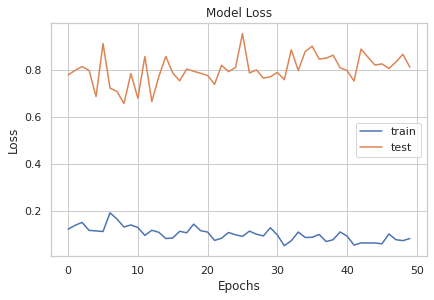

In [31]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

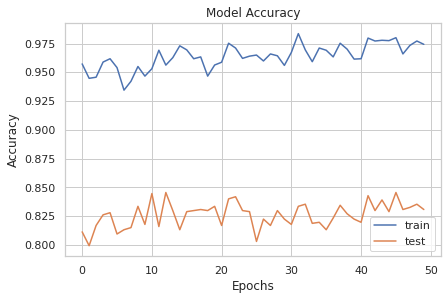

In [32]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


<a id="content5"></a>
## 5 ) Hình dung các dự đoán trên Bộ xác thực 

In [33]:
# nhan du doan tren tap hop val.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [34]:
# hien dang luu tru mot so chi muc dung cach cung nhu phan loai sai '. 
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==50):
        break
#luu 20 anh
i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==50):
        break

#### CORRECTLY CLASSIFIED FLOWER IMAGES

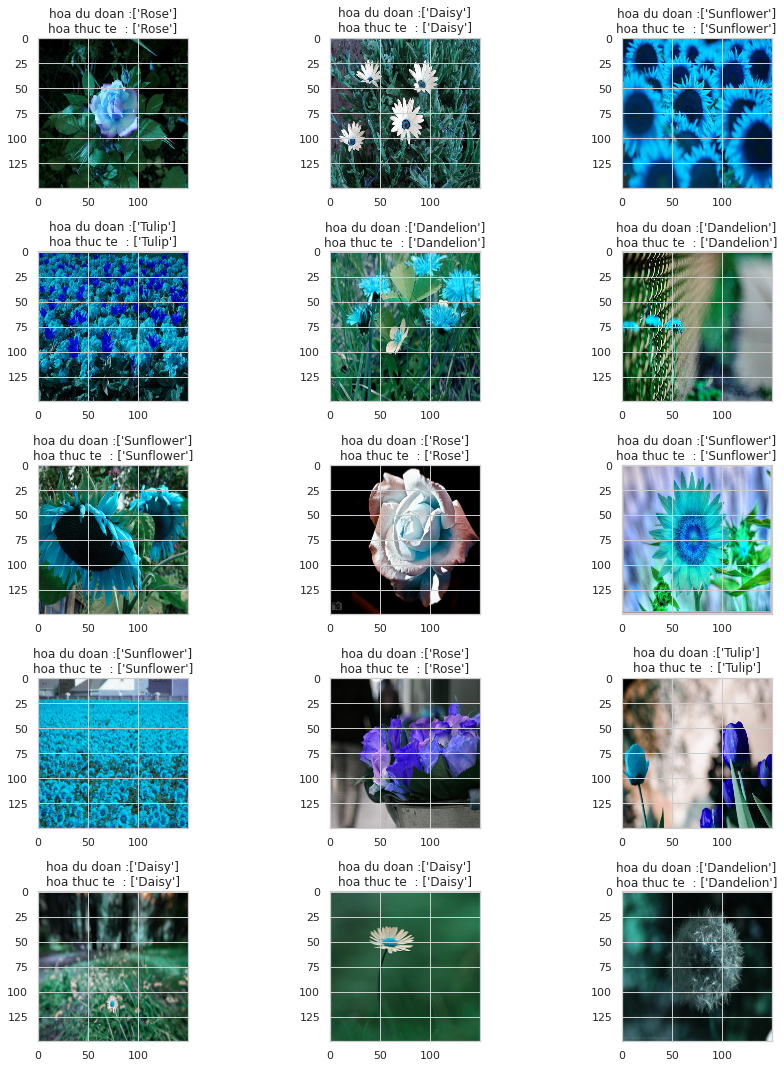

In [35]:
warnings.filterwarnings('always')
import random
warnings.filterwarnings('ignore')

count=random.randint(0,5)
fig,ax=plt.subplots(5,3) #range 15
fig.set_size_inches(15,15)
for i in range (5):
    for j in range (3):
        ax[i,j].imshow(x_test[prop_class[count]]) # show anh
        ax[i,j].set_title("hoa du doan :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"hoa thuc te  : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1


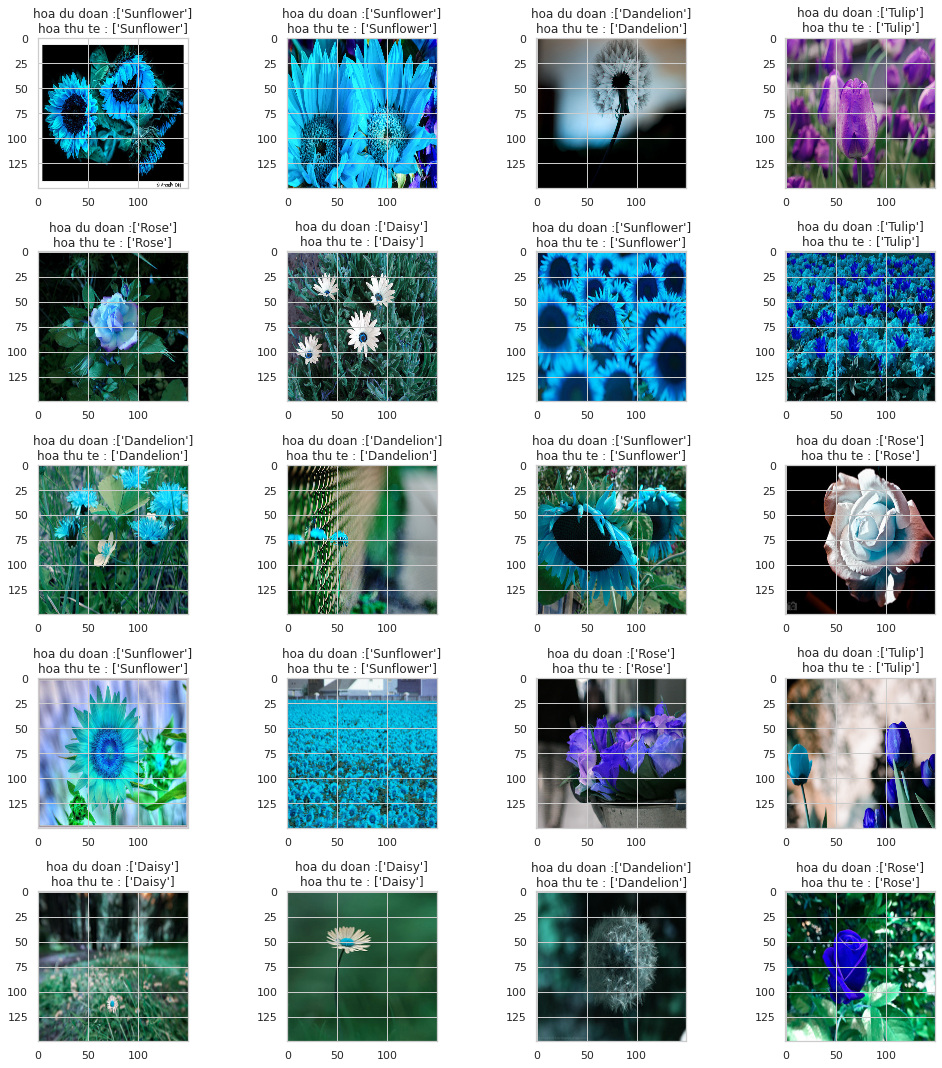

In [39]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(5,4)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range (4):
        ax[i,j].imshow(x_test[prop_class[count]])
        # ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        ax[i,j].set_title("hoa du doan :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"hoa thu te : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1
